# Relevant Paper Abstracts and Wordclouds

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import bigrams

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True)

True

In [2]:
df_relevant = pd.read_excel('results/final/final_results.xlsx', sheet_name='relevant_papers')
df_all_papers = pd.read_csv('results/ICSE_all_papers.csv')

print("Relevant Shape:", df_relevant.shape)
print("All Papers Shape:", df_all_papers.shape)

Relevant Shape: (177, 28)
All Papers Shape: (692, 11)


In [3]:
# Relevant Paper List
relevant_papers = df_relevant['title'].tolist()

# Remove relevant papers from all papers to create final non-relevant set
df_non_relevant = df_all_papers[~df_all_papers['title'].isin(relevant_papers)].copy()

# Make sure all non-relevant papers are marked as such
df_non_relevant['relevant'] = False

# Re-order columns to match relevant dataframe
common_columns = ['reviewer', 'relevant', 'year', 'title', 'authors', 'url', 'abstract', 'artifact_available', 'artifact_reusable', 'artifact_functional', 'ai']
df_non_relevant = df_non_relevant[common_columns]

# Add extra columns: 'task', 'non_llm_approaches', 'models_open_closed', 'num_models', 'model_families', 'model_scale', 'model_size_free_text', 'model_sizes_reported', 'model_config', 'dataset_type', 'programming_language', 'cost', 'cost_free_text', 'artefact_manual', 'contamination', 'contamination_free_text'
extra_columns = ['task', 'non_llm_approaches', 'models_open_closed', 'num_models', 'model_families', 'model_scale', 'model_size_free_text', 'model_sizes_reported', 'model_config', 'dataset_type', 'programming_language', 'cost', 'cost_free_text', 'artefact_manual', 'contamination', 'contamination_free_text']
for col in extra_columns:
    df_non_relevant[col] = None

# Combine relevant and non-relevant dataframes
df_combined = pd.concat([df_relevant, df_non_relevant], ignore_index=True)

In [4]:
def create_wordcloud_with_ngrams(df, use_bigrams=False):
    """
    Create a word cloud from abstracts using either unigrams OR bigrams.
    
    Parameters:
    - use_bigrams: If True, creates bigram word cloud. If False, creates unigram word cloud.
    """
    # Filter for AI papers
    relevant_papers = df[df["relevant"] == True]
    
    # Combine all abstracts into one text
    all_abstracts = " ".join(relevant_papers["abstract"].astype(str))
    
    # Get standard English stopwords
    sw = set(stopwords.words('english'))
    
    # Tokenize and clean (common for both branches)
    tokens = word_tokenize(all_abstracts.lower())
    clean_tokens = [token for token in tokens if token.isalpha() and len(token) > 2 and token not in sw]
    
    if use_bigrams:
        # Generate bigrams
        bigram_list = list(bigrams(clean_tokens))
        bigram_strings = [f"{word1}_{word2}" for word1, word2 in bigram_list]
        
        # Count bigram frequencies
        word_freq = Counter(bigram_strings)
        
        # Create text for word cloud
        wordcloud_text = []
        for bigram, freq in word_freq.items():
            wordcloud_text.extend([bigram] * freq)
        
        wordcloud_input = " ".join(wordcloud_text)
        
    else:
        # For unigrams - use clean tokens
        word_freq = Counter(clean_tokens)
        
        # Create text for word cloud
        wordcloud_text = []
        for word, freq in word_freq.items():
            wordcloud_text.extend([word] * freq)
        
        wordcloud_input = " ".join(wordcloud_text)
    
    # Generate word cloud
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        stopwords=set(),  # No additional stopwords needed since we pre-filtered
        max_words=100,
        relative_scaling=0.5,
        colormap='viridis',
        collocations=False
    ).generate(wordcloud_input)
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Print top terms
    gram_type = "bigrams" if use_bigrams else "unigrams"
    print(f"\nTop 20 most frequent {gram_type} in {len(relevant_papers)} LLM paper abstracts:")
    for term, count in word_freq.most_common(20):
        print(f"{term}: {count}")
    
    # return word_freq

Unigram Word Cloud and Frequencies:


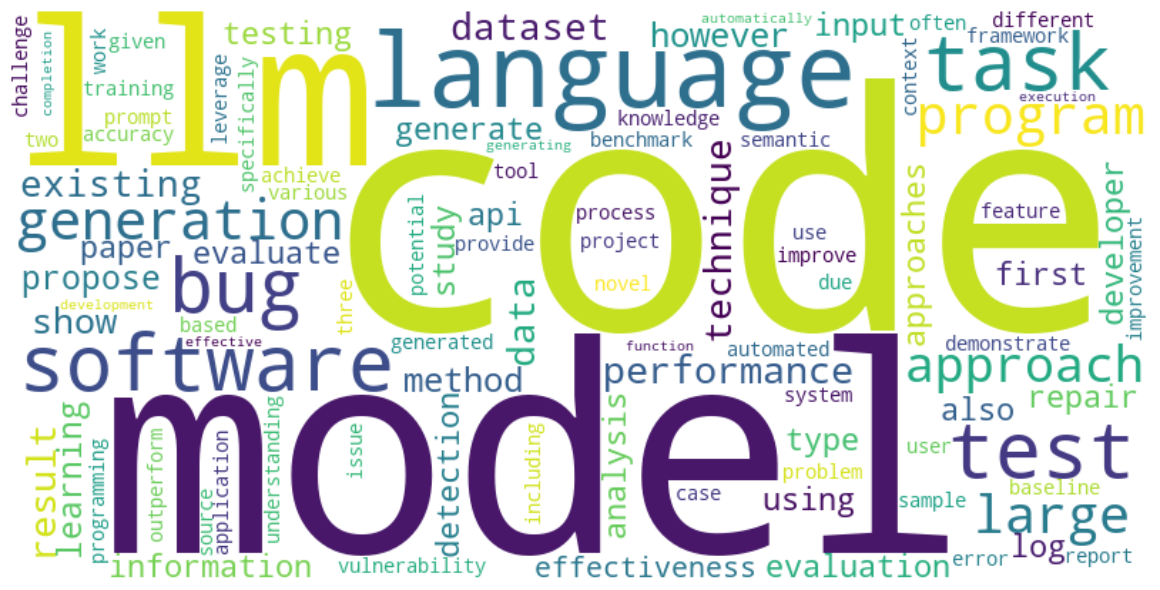


Top 20 most frequent unigrams in 177 LLM paper abstracts:
code: 626
models: 302
llms: 298
language: 221
software: 178
model: 163
generation: 152
large: 142
test: 136
approach: 125
performance: 122
data: 117
results: 117
existing: 116
tasks: 114
however: 103
program: 103
learning: 96
techniques: 92
study: 91


In [5]:
print("Unigram Word Cloud and Frequencies:")
create_wordcloud_with_ngrams(df_combined, use_bigrams=False)

Bigram Word Cloud and Frequencies:


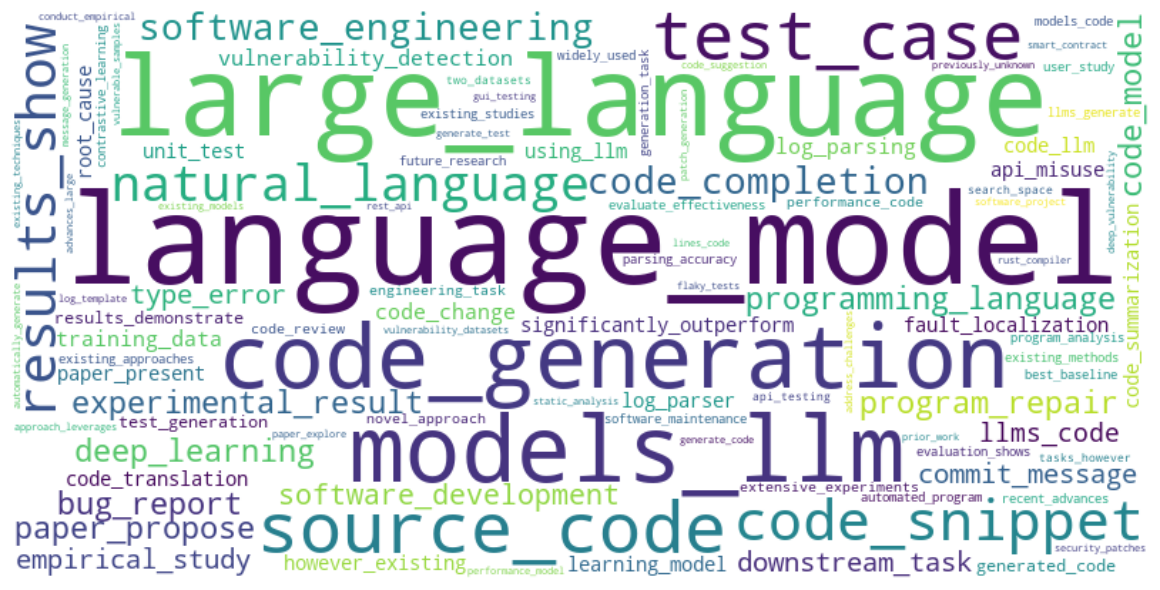


Top 20 most frequent bigrams in 177 LLM paper abstracts:
language_models: 123
large_language: 113
models_llms: 73
code_generation: 68
source_code: 41
results_show: 36
natural_language: 34
software_engineering: 33
test_cases: 32
code_completion: 31
experimental_results: 30
deep_learning: 29
program_repair: 28
code_snippets: 24
code_models: 23
language_model: 23
bug_reports: 23
software_development: 21
empirical_study: 19
paper_propose: 18


In [6]:
print("Bigram Word Cloud and Frequencies:")
create_wordcloud_with_ngrams(df_combined, use_bigrams=True)